In [1]:
!pip install surprise

  Running setup.py bdist_wheel for scikit-surprise: started
  Running setup.py bdist_wheel for scikit-surprise: finished with status 'done'
  Stored in directory: C:\Users\KY\AppData\Local\pip\Cache\wheels\ec\c0\55\3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


In [1]:
import surprise
import pandas as pd
import numpy as np

In [26]:
data = surprise.Dataset.load_builtin('ml-100k')

In [28]:
df = pd.DataFrame(data.raw_ratings, columns=['user','item','rate','id'])

In [30]:
del df['id']

### 샘플 평점 데이터

In [31]:
df.head()

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [32]:
dt = df.set_index(['user','item']).unstack()
dt.iloc[0:10, 0:10].fillna('')

rate                                          
item    1 10 100 1000 1001 1002 1003 1004 1005 1006
user                                               
1       5  3   5                                   
10      4      5                                   
100                                                
101     3                                          
102     3                                          
103                                                
104        2   4                                   
105                                                
106     4      3                                   
107

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Rate Matrix')

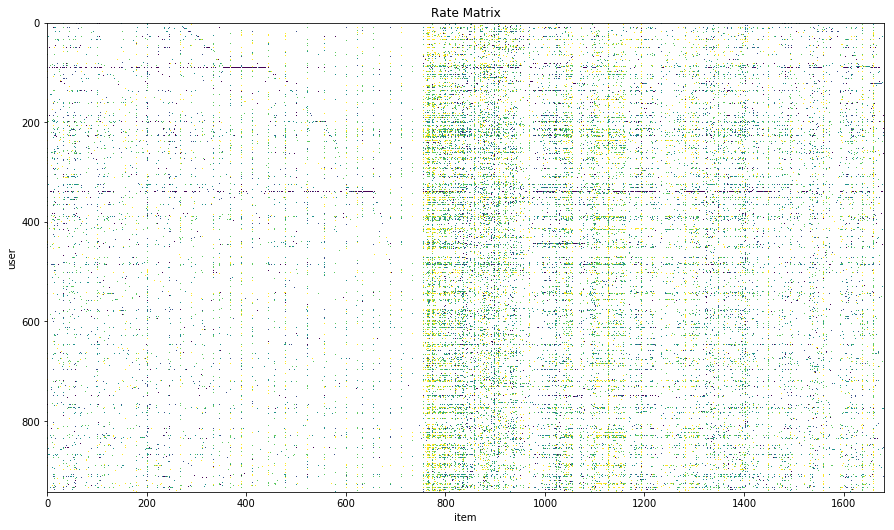

In [34]:
plt.figure(figsize=(15,15))
plt.imshow(dt)
plt.grid(False)
plt.xlabel('item')
plt.ylabel('user')
plt.title('Rate Matrix')

### 베이스 라인 모형
* 사용자와 상품의 평균 평점의 합으로 계산

In [35]:
from surprise.model_selection import KFold

In [36]:
bsl_param = {'method': 'als', 'n_epochs':5, 'reg_u':12, 'reg_i':5}
model = surprise.BaselineOnly(bsl_options=bsl_param)

In [38]:
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    model.fit(trainset)
    pred = model.test(testset)
    acc[i] = surprise.accuracy.rmse(pred, verbose=True)
acc.mean()

Estimating biases using als...
RMSE: 0.9455
Estimating biases using als...
RMSE: 0.9432
Estimating biases using als...
RMSE: 0.9431


0.9439531573610811

In [40]:
from surprise.model_selection import cross_validate
cross_validate(model, data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.93827201, 0.93593255, 0.94762093, 0.94463634, 0.94185712]),
 'test_mae': array([0.74240804, 0.74201526, 0.74980574, 0.74993755, 0.74350559]),
 'fit_time': (0.09604120254516602,
  0.14729094505310059,
  0.15619254112243652,
  0.14063286781311035,
  0.10198974609375),
 'test_time': (0.07810449600219727,
  0.1250009536743164,
  0.10938739776611328,
  0.12347054481506348,
  0.09372496604919434)}